## LLM

In [1]:
import sys
sys.path.insert(0, '../src/')

import matplotlib.pyplot as plt
from tokenizer import TokenizerBPE
from data_handling import normalize_to_ascii
import numpy as np
import re

import os
import tensorflow as tf
import pickle as pkl
from tqdm.notebook import tqdm
import json

# disable gpu for testing purposes
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


c:\Users\krist\anaconda3\envs\keras-gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


RuntimeError: CPU dispatcher tracer already initlized

RuntimeError: CPU dispatcher tracer already initlized

RuntimeError: CPU dispatcher tracer already initlized

RuntimeError: CPU dispatcher tracer already initlized

RuntimeError: CPU dispatcher tracer already initlized

RuntimeError: CPU dispatcher tracer already initlized

Num GPUs Available:  0


## CoQA

In [2]:
with open('../corpus/hotpot_train_v1.1.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
length = len(data)

In [4]:
data[0]['question']

"Which magazine was started first Arthur's Magazine or First for Women?"

In [5]:
data[0]['answer']

"Arthur's Magazine"

In [6]:
data[0]['context']

[['Radio City (Indian radio station)',
  ["Radio City is India's first private FM radio station and was started on 3 July 2001.",
   ' It broadcasts on 91.1 (earlier 91.0 in most cities) megahertz from Mumbai (where it was started in 2004), Bengaluru (started first in 2001), Lucknow and New Delhi (since 2003).',
   ' It plays Hindi, English and regional songs.',
   ' It was launched in Hyderabad in March 2006, in Chennai on 7 July 2006 and in Visakhapatnam October 2007.',
   ' Radio City recently forayed into New Media in May 2008 with the launch of a music portal - PlanetRadiocity.com that offers music related news, videos, songs, and other music-related features.',
   ' The Radio station currently plays a mix of Hindi and Regional music.',
   ' Abraham Thomas is the CEO of the company.']],
 ['History of Albanian football',
  ['Football in Albania existed before the Albanian Football Federation (FSHF) was created.',
   " This was evidenced by the team's registration at the Balkan Cup 

In [7]:
data[2]

{'supporting_facts': [['Allie Goertz', 0],
  ['Allie Goertz', 1],
  ['Allie Goertz', 2],
  ['Milhouse Van Houten', 0]],
 'level': 'hard',
 'question': 'Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?',
 'context': [['Lisa Simpson',
   ['Lisa Marie Simpson is a fictional character in the animated television series "The Simpsons".',
    ' She is the middle child and most intelligent of the Simpson family.',
    ' Voiced by Yeardley Smith, Lisa first appeared on television in "The Tracey Ullman Show" short "Good Night" on April 19, 1987.',
    ' Cartoonist Matt Groening created and designed her while waiting to meet James L. Brooks.',
    ' Groening had been invited to pitch a series of shorts based on his comic "Life in Hell", but instead decided to create a new set of characters.',
    ' He named the elder Simpson daughter after his younger sister Lisa Groening.',
    ' After appearing on "The Tracey Ullman 

In [20]:
context_list = []
question_list = []
answer_list = []


for i, sample in tqdm(enumerate(data), total=length):
    
    supporting_facts = sample["supporting_facts"]
    supporting_facts = set([fact[0] for fact in supporting_facts])
    context = sample["context"]
    context_accum = []
    for fact in supporting_facts:
        for paragraph in context:
            if fact == paragraph[0]:
                context_accum.extend(paragraph[1])
        
    context_list.append(" ".join(context_accum))
                                    
    q = sample["question"]
    a = sample["answer"]
    question_list.append(q)
    answer_list.append(a)

  0%|          | 0/90447 [00:00<?, ?it/s]

In [23]:
j= 0
print(context_list[j], question_list[j], answer_list[j])

First for Women is a woman's magazine published by Bauer Media Group in the USA.  The magazine was started in 1989.  It is based in Englewood Cliffs, New Jersey.  In 2011 the circulation of the magazine was 1,310,696 copies. Arthur's Magazine (1844–1846) was an American literary periodical published in Philadelphia in the 19th century.  Edited by T.S. Arthur, it featured work by Edgar A. Poe, J.H. Ingraham, Sarah Josepha Hale, Thomas G. Spear, and others.  In May 1846 it was merged into "Godey's Lady's Book". Which magazine was started first Arthur's Magazine or First for Women? Arthur's Magazine


In [17]:
sys.path.insert(0, '../')
tokenizer = pkl.load(open("../tokenizers/tokenizer_superQA_24k.pkl", "rb"))
tokenizer.create_hash()
tokenizer.add_special_tokens(["<s>", "</s>", "<q>", "<a>", "<pad>"])

In [18]:
def fused_sqa(context_list, question_grouped_list, answer_grouped_list):
    q ="<q>"
    a = "<a>"
    sos = "<s>"
    eos = "</s>"

    rcw = re.compile(r"\s+")

    corpus_list = []
    for context, question, answer in tqdm(list(zip(context_list, question_list, answer_list))):
        context = context.replace("\n", " ").replace("\r", " ")
        context = rcw.sub(" ", context).strip()
        context = normalize_to_ascii(context).lower()

        question = question.replace("\n", " ").replace("\r", " ")
        question = rcw.sub(" ", question).strip()
        question = normalize_to_ascii(question).lower()

        answer = answer.replace("\n", " ").replace("\r", " ")
        answer = rcw.sub(" ", answer).strip()
        answer = normalize_to_ascii(answer).lower()

        sqa = [sos, context, q, question, a, answer, ".", eos]
        corpus_list.append("".join(sqa))
        
        
    return corpus_list

In [32]:
fused = fused_sqa(context_list, question_list, answer_list)

  0%|          | 0/90447 [00:00<?, ?it/s]

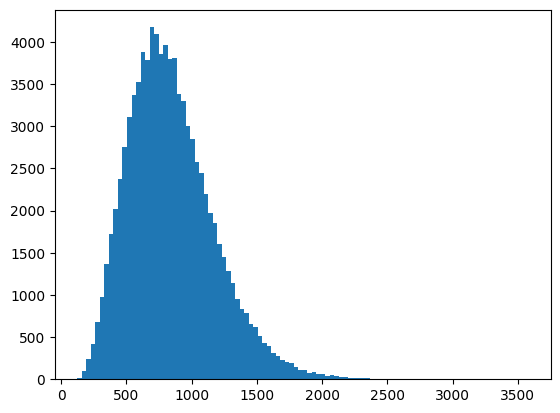

In [ ]:
len_list = [len(x) for x in context_list]

plt.hist(len_list, bins=100)
plt.show()

In [2]:
sys.path.insert(0, '../')
tokenizer = pkl.load(open("../tokenizers/tokenizer_superQA_24k.pkl", "rb"))
tokenizer.create_hash()
tokenizer.add_special_tokens(["<s>", "</s>", "<q>", "<a>", "<pad>"])

In [46]:
print(fused[100])

<s>prince george of denmark and norway, duke of cumberland (danish: "jrgen" ; 2 april 165328 october 1708), was the husband of queen anne, who reigned over great britain from 1702. prince william, duke of gloucester (24 july 1689  30 july 1700 ) was the son of princess anne, later queen of england, ireland and scotland from 1702, and her husband, prince george, duke of cumberland. he was their only child to survive infancy. styled duke of gloucester, he was viewed by contemporaries as a protestant champion because his birth seemed to cement the protestant succession established in the "glorious revolution" that had deposed his catholic grandfather james ii the previous year.<q>prince william, duke of gloucester and prince george of denmark, were eventually monarchs of which kingdom?<a>great britain.</s>


In [47]:
corpus_encoded = [tokenizer.encode(line.lower()) for line in tqdm(fused)]

pkl.dump(corpus_encoded, open('../corpus/corpus_clean/corpus_hotpot_sqa_24k', 'wb'))

  0%|          | 0/90447 [00:00<?, ?it/s]

## Padding

In [22]:
def pack_and_pad_corpus(corpus, max_length, tokenizer):
    pad_token = tokenizer.token_to_idx["<pad>"]
    packed_corpus = []
    current_block = []
    current_length = 0

    for line in tqdm(corpus):
        line_len = line.shape[1]

        if line_len > max_length:
            # Truncate long lines
            line = line[:, :max_length]
            line_len = max_length

        if current_length + line_len > max_length:
            # Finalize current block with padding
            combined = tf.concat(current_block, axis=1)
            padding_needed = max_length - combined.shape[1]
            if padding_needed > 0:
                pad = tf.repeat(tf.constant([[pad_token]]), padding_needed, axis=1)
                combined = tf.concat([combined, pad], axis=1)
            packed_corpus.append(combined)
            current_block = [line]
            current_length = line_len
        else:
            current_block.append(line)
            current_length += line_len

    # Handle any remaining block
    if current_block:
        combined = tf.concat(current_block, axis=1)
        padding_needed = max_length - combined.shape[1]
        if padding_needed > 0:
            pad = tf.repeat(tf.constant([[pad_token]]), padding_needed, axis=1)
            combined = tf.concat([combined, pad], axis=1)
        packed_corpus.append(combined)

    return tf.concat(packed_corpus, axis=0)

In [7]:
corpus_encoded = pkl.load(open('../corpus/corpus_clean/corpus_hotpot_sqa_24k', 'rb'))
corpus_padded = pack_and_pad_corpus(corpus_encoded, 768, tokenizer)
pkl.dump(corpus_padded, open('../corpus/corpus_clean/corpus_hotpot_sqa_24k_padded', 'wb'))

  0%|          | 0/90447 [00:00<?, ?it/s]

In [8]:
corpus_padded.shape

TensorShape([32256, 768])

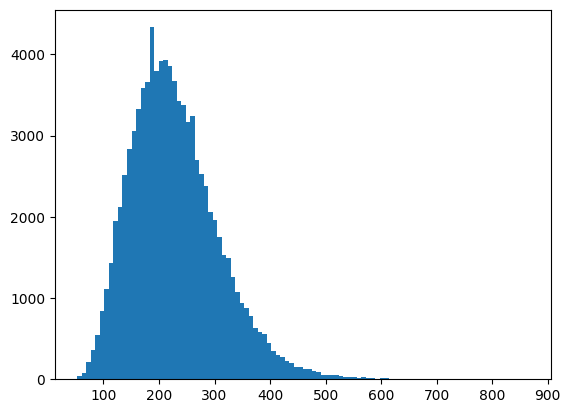

In [51]:
len_list = [x.shape[1] for x in corpus_encoded]

plt.hist(len_list, bins=100)
plt.show()

## No Redundancy

In [14]:
context_list = []
question_list = []
answer_list = []


for i, sample in tqdm(enumerate(data), total=length):
    
    supporting_facts = sample["supporting_facts"]
    context = sample["context"]
    context_accum = []
    for fact, idx in supporting_facts:
        for paragraph in context:
            if fact == paragraph[0]:
                try:
                    context_accum.append(paragraph[1][idx])
                except IndexError:
                    print(f"IndexError for fact {fact} at index {idx} in paragraph {paragraph[0]}")
                    continue
        
    context_list.append(" ".join(context_accum))
                                    
    q = sample["question"]
    a = sample["answer"]
    question_list.append(q)
    answer_list.append(a)

  0%|          | 0/90447 [00:00<?, ?it/s]

IndexError for fact Minoru Suzuki at index 2 in paragraph Minoru Suzuki
IndexError for fact Jonathan Taylor Thomas at index 20 in paragraph Jonathan Taylor Thomas
IndexError for fact Francis Poulenc at index 3 in paragraph Francis Poulenc
IndexError for fact Pan's Labyrinth at index 2 in paragraph Pan's Labyrinth
IndexError for fact Rupert Grint at index 4 in paragraph Rupert Grint
IndexError for fact Walkerville, South Australia at index 52 in paragraph Walkerville, South Australia
IndexError for fact Khady Sylla at index 2 in paragraph Khady Sylla
IndexError for fact Robbie Rist at index 52 in paragraph Robbie Rist
IndexError for fact Harry Styles at index 4 in paragraph Harry Styles
IndexError for fact William T. Anderson at index 2 in paragraph William T. Anderson
IndexError for fact South Park (season 12) at index 20 in paragraph South Park (season 12)
IndexError for fact Hutterite at index 40 in paragraph Hutterite
IndexError for fact 2013 Moore tornado at index 2 in paragraph 20

In [16]:
print(context_list[1], question_list[1], answer_list[1])

The Oberoi family is an Indian family that is famous for its involvement in hotels, namely through The Oberoi Group. The Oberoi Group is a hotel company with its head office in Delhi. The Oberoi family is part of a hotel company that has a head office in what city? Delhi


In [19]:
fused = fused_sqa(context_list, question_list, answer_list)

  0%|          | 0/90447 [00:00<?, ?it/s]

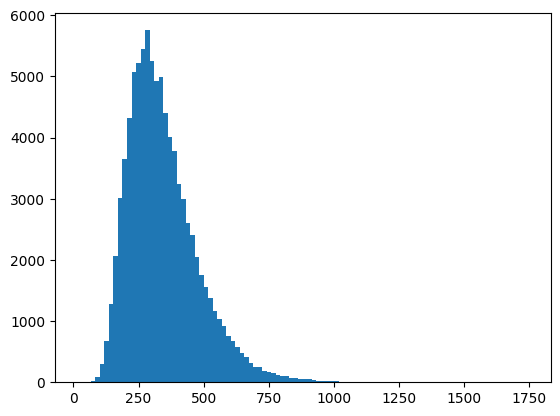

In [20]:
len_list = [len(x) for x in context_list]

plt.hist(len_list, bins=100)
plt.show()

In [21]:
corpus_encoded = [tokenizer.encode(line.lower()) for line in tqdm(fused)]

pkl.dump(corpus_encoded, open('../corpus/corpus_clean/corpus_hotpot_sqa_noRed_24k', 'wb'))

  0%|          | 0/90447 [00:00<?, ?it/s]

In [23]:
corpus_encoded = pkl.load(open('../corpus/corpus_clean/corpus_hotpot_sqa_noRed_24k', 'rb'))
corpus_padded = pack_and_pad_corpus(corpus_encoded, 768, tokenizer)
pkl.dump(corpus_padded, open('../corpus/corpus_clean/corpus_hotpot_sqa_noRed_24k_padded', 'wb'))

  0%|          | 0/90447 [00:00<?, ?it/s]

In [24]:
corpus_padded.shape

TensorShape([14710, 768])

## 